<a href="https://colab.research.google.com/github/ASMASHAIKH04/CREDIT-CARD-FRAUD-DETECTION/blob/main/FRAUD_DETECTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


Code : Loading the Data

In [2]:
data = pd.read_csv("creditcard.csv")

Code : Understanding the Data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Code : Describing the Data

In [4]:
print(data.shape)
print(data.describe())

(35742, 31)
               Time            V1            V2            V3            V4  \
count  35742.000000  35742.000000  35742.000000  35742.000000  35742.000000   
mean   23997.300823     -0.208427      0.072579      0.718292      0.195733   
std    12423.654094      1.836736      1.540565      1.540896      1.409063   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    12283.500000     -0.960139     -0.499301      0.244741     -0.714475   
50%    28992.000000     -0.234480      0.114024      0.827554      0.188607   
75%    34258.000000      1.162263      0.755015      1.456358      1.078531   
max    38241.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  35742.000000  35741.000000  35741.000000  35741.000000  35741.000000   
mean      -0.216686      0.095575     -0.116847      0.032755      0.259459   
std        1.388746      1.310633      

Code : Imbalance in the data
Time to explain the data we are dealing with

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.002890173410404624
Fraud Cases: 103
Valid Transactions: 35638


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first,let’s implement the model without it and will balance the data only if needed.

Code : Print the amount details for Fraudulent Transaction

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,103.000000
mean,90.471165
std,247.173335
min,0.000000
25%,1.000000
50%,3.760000
75%,99.990000
max,1809.680000


As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

Code : Print the amount details for Normal Transaction

In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,35638.000000
mean,84.185241
std,227.223359
min,0.000000
25%,7.000000
50%,22.000000
75%,76.000000
max,7879.420000


Code : Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

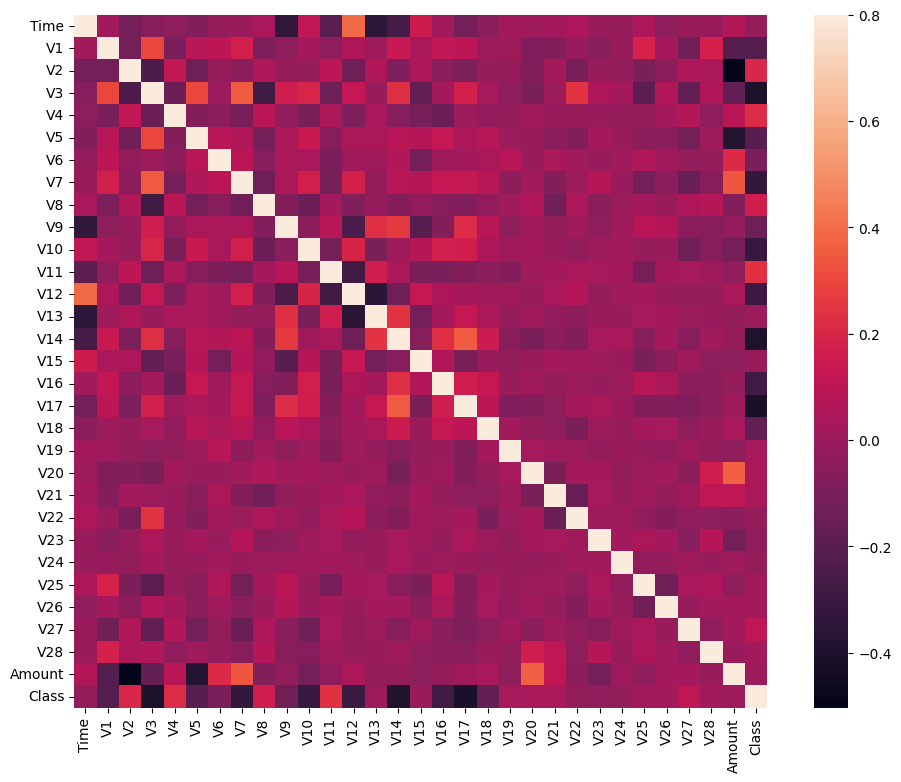

In [8]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

Code : Separating the X and the Y values
Dividing the data into inputs parameters and outputs value format

In [9]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(35742, 30)
(35742,)


In [10]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


Code : Building a Random Forest Model using scikit learn

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier with desired parameters
rfc = RandomForestClassifier()
# Find indices of NaN values in yTrain
nan_indices = np.isnan(yTrain)

# Remove rows with NaN values from xTrain and yTrain
xTrain_imputed = xTrain[~nan_indices]
yTrain = yTrain[~nan_indices]

# Now you can use xTrain_imputed and yTrain for training your RandomForestClassifier
rfc.fit(xTrain_imputed, yTrain)


# Now you can use xTrain_imputed and yTrain for training your RandomForestClassifier
rfc.fit(xTrain_imputed, yTrain)


RandomForestClassifier()

In [12]:


# Importing the imputer from sklearn
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on xTrain to learn the mean value for each feature
imputer.fit(xTrain)

# Transform xTrain to fill missing values with the learned means
xTrain_imputed = imputer.transform(xTrain)

# Check if there are any NaN values in xTrain_imputed and yTrain
# Ensure that they have consistent numbers of samples
print(np.isnan(xTrain_imputed).sum())
print(np.isnan(yTrain).sum())
print(xTrain_imputed.shape)
print(yTrain.shape)

# If there are inconsistencies, drop the corresponding rows from both xTrain_imputed and yTrain
nan_indices = np.isnan(yTrain)
nan_indices = np.concatenate((nan_indices, [False]))  # Add False to match the length
nan_indices = nan_indices[:len(xTrain_imputed)]  # Ensure the length matches xTrain_imputed

xTrain_imputed = xTrain_imputed[~nan_indices]
yTrain = yTrain[~nan_indices]

# Now you can use xTrain_imputed and yTrain for training your RandomForestClassifier
rfc.fit(xTrain_imputed, yTrain)


# Now you can use xTrain_imputed and yTrain for training your RandomForestClassifier
rfc.fit(xTrain_imputed, yTrain)


0
0
(28593, 30)
(28593,)


RandomForestClassifier()

In [13]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on xTrain to learn the mean value for each feature
imputer.fit(xTrain)

# Transform xTrain to fill missing values with the learned means
xTrain_imputed = imputer.transform(xTrain)

# Now use xTrain_imputed and yTrain for training your RandomForestClassifier
rfc.fit(xTrain_imputed, yTrain)


RandomForestClassifier()

Code : Building all kinds of evaluating parameters

In [14]:
# Importing necessary modules for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split


print(data.columns)

# Replace 'Class' with the actual name of your target column
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can train your model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Now, you can evaluate your model
print("Type of y_pred:", type(y_pred))

# Check if y_pred and y_test are numpy arrays
if isinstance(y_pred, np.ndarray) and isinstance(y_test, np.ndarray):
    # Check the shape of y_pred and y_test
    print("Shape of y_pred:", y_pred.shape)
    print("Shape of y_test:", y_test.shape)

    # Calculate and print accuracy
    acc = accuracy_score(y_test, y_pred)
    print("The accuracy is {:.2f}".format(acc))

    # Calculate and print precision
    prec = precision_score(y_test, y_pred)
    print("The precision is {:.2f}".format(prec))

    # Calculate and print recall
    rec = recall_score(y_test, y_pred)
    print("The recall is {:.2f}".format(rec))

    # Calculate and print F1-score
    f1 = f1_score(y_test, y_pred)
    print("The F1-Score is {:.2f}".format(f1))

    # Calculate and print Matthews correlation coefficient
    MCC = matthews_corrcoef(y_test, y_pred)
    print("The Matthews correlation coefficient is {:.2f}".format(MCC))
else:
    print("y_pred and y_test should be numpy arrays for comparison.")


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Type of y_pred: <class 'numpy.ndarray'>
y_pred and y_test should be numpy arrays for comparison.


Code : Visualizing the Confusion Matrix

NaN values in y_test: 1
NaN values in y_pred: 0


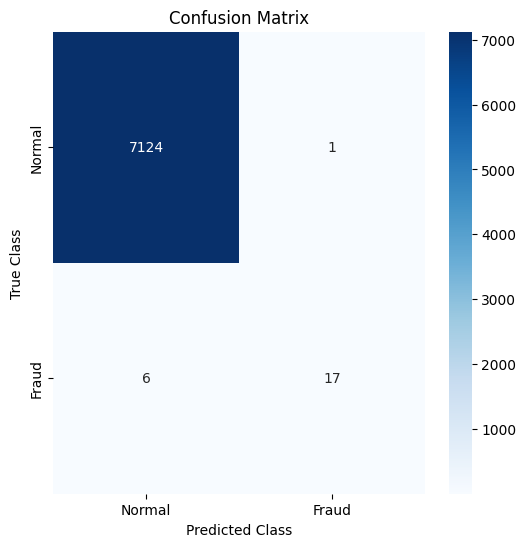

In [20]:
# Import necessary libraries for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Check for NaN values in y_test and y_pred
print("NaN values in y_test:", np.isnan(y_test).sum())
print("NaN values in y_pred:", np.isnan(y_pred).sum())

# Remove NaN values if present
y_test_clean = y_test[~np.isnan(y_test)]
y_pred_clean = y_pred[~np.isnan(y_test)]

# Ensure both arrays have the same length
min_length = min(len(y_test_clean), len(y_pred_clean))
y_test_clean = y_test_clean[:min_length]
y_pred_clean = y_pred_clean[:min_length]

# Define labels for the confusion matrix
LABELS = ['Normal', 'Fraud']

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_clean, y_pred_clean)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
